This example demonstrates the process of saving multiple Trieste `Collection` objects to a single file. More specifically, we will transform three multi-extension FITS files into `Collection` objects, retaining the FITS header data. The three collections will then be stored into a single Trieste file. The file will then be read and examined. Finally, we show how to convert a `Collection` back into a FITS `HDUList`.

In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import trieste as tr
from trieste import utils
import astropy.io.fits as fits

Let's load three multi-extension FITS files and put them into a Trieste file...

In [3]:
one = utils.fits_to_collection("one.fits")
two = utils.fits_to_collection("two.fits")
three = utils.fits_to_collection("three.fits")

At this point, we have 3 Trieste `Collection` objects (`one`, `two`, and `three`). Verify the type:

In [4]:
type(one)

trieste.core.Collection

Alternatively,

In [5]:
two

<two.fits: a Collection of 3 2-D Arrays>

Create a documentation string / README for the file that we are going to create:

In [6]:
readme = "An example of storing several multi-extension FITS files within a Trieste file."

Create the file:

In [7]:
tr.save("group", {'doc': readme}, one, two, three)

Now, let's see what is in the directory. Note the file sizes:

In [8]:
ls -sh *.fits *.npz

 14M demo.npz   1.2M jellies.npz  1.2M three.fits
812K group.npz  392K one.fits     720K two.fits


The `group.npz` file is considerably smaller than the three FITS files that were used to create it, because it is compressed. Let's try reading the file to see what we put in there...

In [9]:
group = tr.load("group.npz")

In [10]:
group

<group.npz: a Trieste file>

Let's take a look at some of the Trieste file's properties...

In [11]:
group.readme

'An example of storing several multi-extension FITS files within a Trieste file.'

In [12]:
group.name

'group.npz'

In [13]:
group.print_toc()


 Index      Name               Type
 -----------------------------------------
     0 :    one.fits           2-D Array Collection
     1 :    two.fits           2-D Array Collection
     2 :    three.fits         2-D Array Collection
 -----------------------------------------


There are a few ways to access the contents: 

1. using the name of an object within the file.

2. indexing into the file.

3. iterating through the contents.

In [14]:
group['one.fits']

<one.fits: a Collection of 3 2-D Arrays>

In [15]:
group[0]

<one.fits: a Collection of 3 2-D Arrays>

In [16]:
for ob in group:
    print(ob.name)

one.fits
two.fits
three.fits


The history that led to the creation of the file:

In [17]:
group.print_history()

%pylab notebook
import trieste as tr
from trieste import utils
import astropy.io.fits as fits
one = utils.fits_to_collection("one.fits")
two = utils.fits_to_collection("two.fits")
three = utils.fits_to_collection("three.fits")
type(one)
two
readme = "An example of storing several multi-extension FITS files within a Trieste file."
tr.save("group", {'doc': readme}, one, two, three)


Now let's look an one of the individual objects within the file:

In [18]:
a = group[0]

In [19]:
a

<one.fits: a Collection of 3 2-D Arrays>

In [20]:
a.toc

['SCI', 'VAR', 'FLAG']

In [21]:
a[0]

<SCI: a Trieste 2-D Array>

This array has a name:

In [22]:
a[0].name


'SCI'

Alternatively, the same array can be fetched from the `Collection` by name, instead of by index:

In [23]:
a['SCI']

<SCI: a Trieste 2-D Array>

In [24]:
A = a['SCI']

The `Array` object, `A` contains a NumPy array and metadata

In [25]:
A.data

array([[ 1113.78663585,  1072.96848847,  1135.86725642, ...,
        10931.24788636, 10909.50885188, 10939.98298516],
       [ 2456.3166538 ,  2537.29667555,  2489.02917282, ...,
        15052.88252041, 15050.28868237, 15059.59972138],
       [ 4674.18464344,  4674.0225045 ,  4669.2114884 , ...,
        19752.38456096, 19808.02734916, 19808.27348673],
       ...,
       [13214.34421885, 13218.61591554, 13268.54431093, ...,
        29405.67156818, 29446.94280608, 29492.03461276],
       [ 8030.78131967,  8075.84368949,  8068.49711793, ...,
        22647.89206072, 22734.0741067 , 22746.28615521],
       [ 4613.56067878,  4592.07317175,  4567.12868135, ...,
        17071.83782726, 17088.14510831, 17083.41126699]])

The data looks like this:

<IPython.core.display.Javascript object>


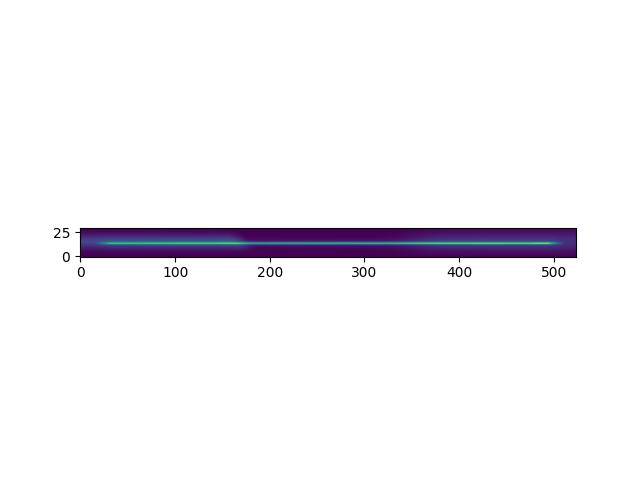

In [26]:
plt.imshow(A.data, origin='lower')

The FITS header keywords and comments are stored in the metadata of the `Array`:

In [27]:
A.metadata

{'': '=',
 'BITPIX': -64,
 'CAT_IDX': 1,
 'CD1_1': 5.1026949964473e-21,
 'CD1_2': 8.33333333333333e-05,
 'CD2_1': -8.3333333333333e-05,
 'CD2_2': 1.02053899928946e-20,
 'CDELT1': 1.0,
 'CDELT2': 1.0,
 'CRPIX1': -12010.0,
 'CRPIX2': 7835.0,
 'CRVAL1': 150.3709536913,
 'CRVAL2': 2.9252540558,
 'CTYPE1': 'RA---TAN',
 'CTYPE2': 'DEC--TAN',
 'CUNIT1': 'deg',
 'CUNIT2': 'deg',
 'DATE': '2017-07-26T00:00:20',
 'DEC_APER': 2.9252540558,
 'EXPNAME': '_v1_CDR_d180515',
 'EXPTIME': 560.0,
 'EXTNAME': 'SCI',
 'GCOUNT': 1,
 'GORIENT': 90,
 'LATPOLE': 2.9252540558,
 'LONPOLE': 180.0,
 'LTM1_1': 1.0,
 'LTM2_2': 1.0,
 'LTV1': 0.0,
 'LTV2': 0.0,
 'NAXIS': 2,
 'NAXIS1': 524,
 'NAXIS2': 30,
 'ORIENTAT': 0.0,
 'PA_APER': 0.0,
 'PC1_1': 5.1026949964473e-21,
 'PC1_2': 8.3333333333333e-05,
 'PC2_1': -8.3333333333333e-05,
 'PC2_2': 1.0205389992895e-20,
 'PCOUNT': 0,
 'RADESYS': 'ICRS',
 'RA_APER': 150.3709536913,
 'VAFACTOR': 1.0,
 'WCSAXES': 2,
 'XTENSION': 'IMAGE',
 'doc': '',
 'fits_comments': {'': '',
  '

It is possible to unpack a Trieste `Collection` and convert it back into a multi-extension FITS file:

In [28]:
hdulist_one = utils.collection_to_fits(one)

In [29]:
hdulist_one.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  SCI           1 ImageHDU        45   (524, 30)   float64   
  2  VAR           1 ImageHDU        45   (524, 30)   float64   
  3  FLAG          1 ImageHDU        47   (524, 30)   uint64   
